## SEIR model in Julia using DifferentialEquations

*Author*: Lloyd Chapman @LloydChapman

*Date*: 2018-10-01

In [1]:
using DifferentialEquations

In [2]:
function seir_ode(dY,Y,p,t)
 dY[1] = p[4]-p[1]*Y[1]*Y[3]-p[4]*Y[1]
 dY[2] = p[1]*Y[1]*Y[3]-(p[2]+p[4])*Y[2]
 dY[3] = p[2]*Y[2] - (p[3]+p[4])*Y[3]
end

seir_ode (generic function with 1 method)

In [3]:
par=[520/365,1/60,1/30,774835/(65640000*365)]
init=[0.8,0.1,0.1]
tspan=(0.0,365.0)

(0.0, 365.0)

In [4]:
seir_prob = ODEProblem(seir_ode,init,tspan,par)

DiffEqBase.ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 365.0)
u0: [0.8, 0.1, 0.1]

In [5]:
sol=solve(seir_prob);

In [6]:
using Plots

In [7]:
R=ones(1,size(sol,2))-sum(sol,1);

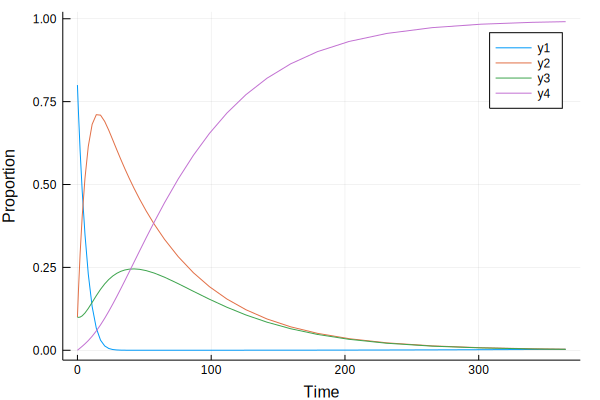

In [8]:
plot(sol.t,[sol',R'],xlabel="Time",ylabel="Proportion")